## Description

Project Objective:

Build a CNN model that classifies the given pet images correctly into dog and cat images.
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping.

## Project Description and Scope:

You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data.



In [1]:
# To mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import MaxPooling2D, Activation, Dropout
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.backend import image_data_format
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from glob import glob
import datetime as dt
import numpy as np
import cv2
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Define Constants

In [10]:
train_path = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/train'
test_path = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test'

In [11]:
sub_class = os.listdir(train_path)
sub_class

['dogs', 'cats']

In [14]:
DataGen = ImageDataGenerator(brightness_range=(0.1,0.4), zoom_range=0.2, horizontal_flip=True, rotation_range=0.2, rescale=1/255)

In [16]:
train_gen = DataGen.flow_from_directory(directory=train_path, target_size=(224,224))

Found 40 images belonging to 2 classes.


In [17]:
train_gen.class_indices

{'cats': 0, 'dogs': 1}

● Input layer
● Convolutional layer 1 with 32 filters of kernel size[5,5]
● Pooling layer 1 with pool size[2,2] and stride 2
● Convolutional layer 2 with 64 filters of kernel size[5,5]
● Pooling layer 2 with pool size[2,2] and stride 2
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32
● Dropout layer with dropout probability 0.4
Predict the class by doing a softmax on the output of the dropout layers.
This should be followed by training and evaluation:
● For the training step, define the loss function and minimize it
● For the evaluation step, calculate the accuracy
Run the program for 100, 200, and 300 iterations, respectively.

In [18]:
model100 = Sequential()

In [21]:
model100.add(Conv2D(32,(5,5), activation='relu', input_shape=(224,224,3)))
model100.add(MaxPooling2D(strides=2))
model100.add(Conv2D(64,(5,5), activation='relu'))
model100.add(MaxPooling2D(strides=2))
model100.add(Dense(32))
model100.add(Dropout(.4))
model100.add(Flatten())
model100.add(Dense(2, activation='softmax'))

In [22]:
model100.compile(loss='categorical_crossentropy', metrics=['Accuracy'])

In [23]:
model100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 52, 52, 32)        2

In [24]:
model100.fit_generator(train_gen, epochs=100)

Epoch 1/100
2/2 [==============================] - 18s 3s/step - loss: 6.4486 - Accuracy: 0.4750
Epoch 2/100
2/2 [==============================] - 1s 612ms/step - loss: 1.1315 - Accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 91ms/step - loss: 0.7530 - Accuracy: 0.4500
Epoch 4/100
2/2 [==============================] - 1s 641ms/step - loss: 0.7254 - Accuracy: 0.4500
Epoch 5/100
2/2 [==============================] - 1s 604ms/step - loss: 0.8088 - Accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 1s 717ms/step - loss: 0.7789 - Accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 1s 137ms/step - loss: 0.6879 - Accuracy: 0.5250
Epoch 8/100
2/2 [==============================] - 1s 177ms/step - loss: 0.6940 - Accuracy: 0.5250
Epoch 9/100
2/2 [==============================] - 1s 194ms/step - loss: 1.2179 - Accuracy: 0.4500
Epoch 10/100
2/2 [==============================] - 1s 87ms/step - loss: 0.6945 - Accuracy: 0.4750
Epoch 11/100


In [28]:
model100.save('PetClass100.h5')

In [29]:
model200 = Sequential()

In [30]:
model200.add(Conv2D(32,(5,5), activation='relu', input_shape=(224,224,3)))
model200.add(MaxPooling2D(strides=2))
model200.add(Conv2D(64,(5,5), activation='relu'))
model200.add(MaxPooling2D(strides=2))
model200.add(Dense(32))
model200.add(Dropout(.4))
model200.add(Flatten())
model200.add(Dense(2, activation='softmax'))

In [31]:
model200.compile(loss='categorical_crossentropy', metrics=['Accuracy'])

In [32]:
model200.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 dense_2 (Dense)             (None, 53, 53, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 53, 53, 32)       

In [33]:
model200.fit_generator(train_gen, epochs=200)

Epoch 1/200
2/2 [==============================] - 3s 830ms/step - loss: 2.5173 - Accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 1s 115ms/step - loss: 3.6412 - Accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 1s 110ms/step - loss: 0.6991 - Accuracy: 0.4000
Epoch 4/200
2/2 [==============================] - 1s 110ms/step - loss: 0.7982 - Accuracy: 0.4500
Epoch 5/200
2/2 [==============================] - 1s 111ms/step - loss: 0.7792 - Accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 568ms/step - loss: 0.7184 - Accuracy: 0.4750
Epoch 7/200
2/2 [==============================] - 1s 558ms/step - loss: 0.8295 - Accuracy: 0.4500
Epoch 8/200
2/2 [==============================] - 1s 110ms/step - loss: 0.6833 - Accuracy: 0.6250
Epoch 9/200
2/2 [==============================] - 1s 184ms/step - loss: 0.7066 - Accuracy: 0.5250
Epoch 10/200
2/2 [==============================] - 1s 871ms/step - loss: 0.6887 - Accuracy: 0.5250
Epoch 11/

In [34]:
model200.save('PetClass200.h5')

In [35]:
model300 = Sequential()

In [36]:
model300.add(Conv2D(32,(5,5), activation='relu', input_shape=(224,224,3)))
model300.add(MaxPooling2D(strides=2))
model300.add(Conv2D(64,(5,5), activation='relu'))
model300.add(MaxPooling2D(strides=2))
model300.add(Dense(32))
model300.add(Dropout(.4))
model300.add(Flatten())
model300.add(Dense(2, activation='softmax'))

In [37]:
model300.compile(loss='categorical_crossentropy', metrics=['Accuracy'])

In [38]:
model300.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 53, 53, 32)        2080      
                                                                 
 dropout_2 (Dropout)         (None, 53, 53, 32)       

In [39]:
model300.fit_generator(train_gen, epochs=300)

Epoch 1/300
2/2 [==============================] - 2s 36ms/step - loss: 1.8020 - Accuracy: 0.4000
Epoch 2/300
2/2 [==============================] - 1s 196ms/step - loss: 2.4594 - Accuracy: 0.6000
Epoch 3/300
2/2 [==============================] - 1s 851ms/step - loss: 0.7258 - Accuracy: 0.4750
Epoch 4/300
2/2 [==============================] - 1s 580ms/step - loss: 1.3324 - Accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 1s 583ms/step - loss: 0.8210 - Accuracy: 0.4500
Epoch 6/300
2/2 [==============================] - 1s 124ms/step - loss: 0.7178 - Accuracy: 0.4000
Epoch 7/300
2/2 [==============================] - 2s 1s/step - loss: 0.7504 - Accuracy: 0.5000
Epoch 8/300
2/2 [==============================] - 1s 581ms/step - loss: 0.7107 - Accuracy: 0.5000
Epoch 9/300
2/2 [==============================] - 1s 105ms/step - loss: 0.6910 - Accuracy: 0.5000
Epoch 10/300
2/2 [==============================] - 1s 585ms/step - loss: 0.7211 - Accuracy: 0.5000
Epoch 11/300


In [40]:
model300.save('PetClass300.h5')

In [42]:
DataGen = ImageDataGenerator(rescale=1/255)
test_gen = DataGen.flow_from_directory(directory=test_path, target_size=(224,224))

Found 482 images belonging to 2 classes.


In [43]:
model100 = load_model('PetClass100.h5')
model100.evaluate_generator(test_gen)

[5.439887046813965, 0.6846473217010498]

In [44]:
model200 = load_model('PetClass200.h5')
model200.evaluate_generator(test_gen)

[18.067018508911133, 0.636929452419281]

In [45]:
model300 = load_model('PetClass300.h5')
model300.evaluate_generator(test_gen)

[10.649205207824707, 0.6846473217010498]

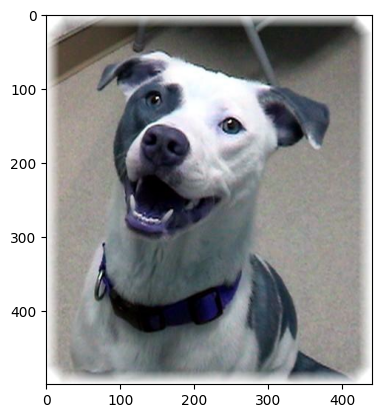

1/1 [==============================] - 0s 113ms/step
[[0. 1.]]


In [48]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/dogs/101.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model100.predict(img)
print(classes)

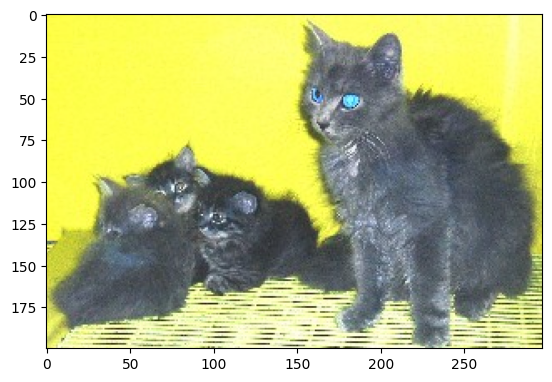

1/1 [==============================] - 0s 56ms/step
[[0. 1.]]


In [49]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/cats/101.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model100.predict(img)
print(classes)

With Model 200

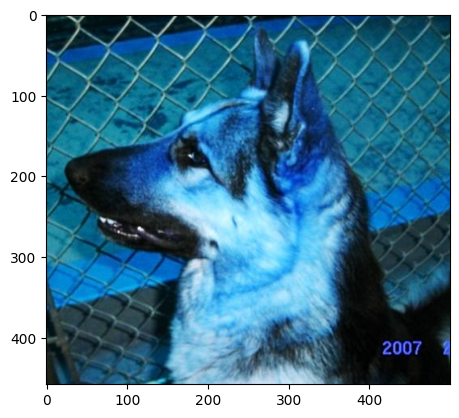

1/1 [==============================] - 0s 169ms/step
[[0. 1.]]


In [50]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/dogs/107.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model200.predict(img)
print(classes)

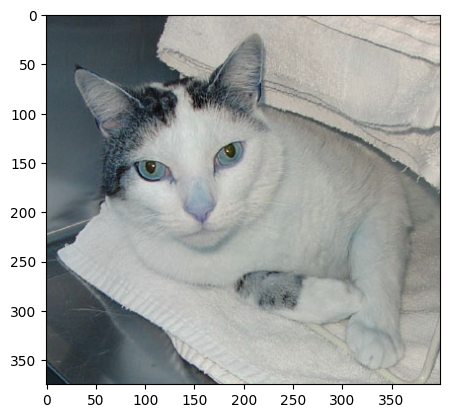

1/1 [==============================] - 0s 33ms/step
[[0. 1.]]


In [51]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/cats/106.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model100.predict(img)
print(classes)

With Model300

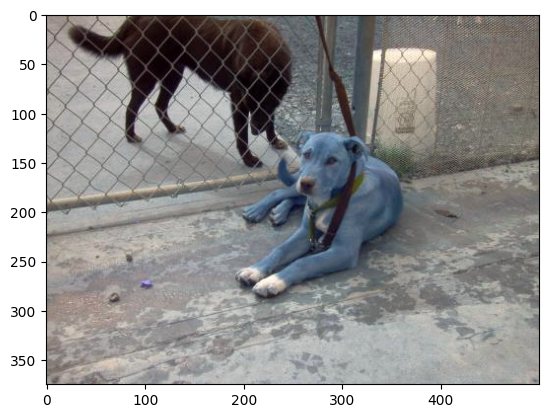

1/1 [==============================] - 0s 116ms/step
[[0. 1.]]


In [52]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/dogs/110.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model300.predict(img)
print(classes)

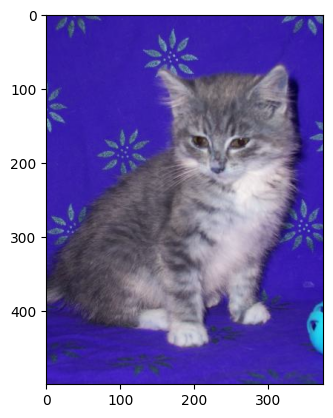

1/1 [==============================] - 0s 30ms/step
[[1. 0.]]


In [53]:
image = '/content/gdrive/MyDrive/1577957291_deeplearningwithkerasandtensorflow/data/test/cats/110.jpg'
img = cv2.imread(image)
plt.imshow(img)
plt.show()
img = cv2.resize(img,(224,224))
img = np.reshape(img, (1, 224, 224, 3))
classes = model100.predict(img)
print(classes)